# 1. SVM 과제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import warnings

# 특정 경고 메시지를 무시하도록 설정
warnings.filterwarnings("ignore", category=FutureWarning)  # FutureWarning 경고 무시
# 경고 무시 설정 해제 (선택사항)
#warnings.filterwarnings("default", category=FutureWarning)

from sklearn.preprocessing import StandardScaler

# 데이터 분함:train, test

from sklearn. model_selection import train_test_split

# 분류 SVM

from sklearn.svm import SVC

# 최적 모델 파라미터 탐색

from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

## 데이터 구성 및 확인

In [2]:
df_raw = pd.read_csv('./datasets/유방암.csv',encoding='euc-kr')
display(df_raw.head())
display(df_raw.info())

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

None

## 데이터 결측치, 이상치 확인

In [3]:
# 결측치 내림차순 정렬하여 확인
df_raw.isnull().sum(axis=0).sort_values(ascending=False).head()

diagnosis               0
compactness_error       0
worst_symmetry          0
worst_concave_points    0
worst_concavity         0
dtype: int64

In [4]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,320.0,15.709703,3.745788,7.691000,13.050000,15.125000,18.520000,28.11000
mean_texture,320.0,20.323250,4.150729,9.710000,17.460000,20.215000,22.500000,39.28000
mean_perimeter,320.0,103.050469,25.835984,47.920000,84.845000,100.100000,121.550000,188.50000
mean_area,320.0,807.735937,391.969297,170.400000,523.900000,713.050000,1075.250000,2501.00000
mean_smoothness,320.0,0.099358,0.014249,0.052630,0.090240,0.098570,0.108050,0.16340
mean_compactness,320.0,0.123252,0.057207,0.026750,0.081132,0.115300,0.155650,0.34540
mean_concavity,320.0,0.122144,0.084822,0.000000,0.052770,0.110850,0.169550,0.42680
mean_concave_points,320.0,0.066977,0.041732,0.000000,0.029538,0.065265,0.091777,0.20120
mean_symmetry,320.0,0.186772,0.027485,0.127400,0.166900,0.184650,0.202700,0.30400
mean_fractal_dimension,320.0,0.062679,0.007190,0.049960,0.057450,0.061445,0.066705,0.09744


In [5]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


In [6]:
# 데이터 분리 : 설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("diagnosis_음성", axis = 1, inplace = False)
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [7]:
df_raw_y = df_raw_dummy["diagnosis_음성"]
df_raw_y.head()

0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

In [8]:
display("설명변수:", df_raw_x.head())
display("목표변수:", df_raw_y.head())

'설명변수:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'목표변수:'

0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

## test, train 데이터 분할 작업

In [9]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4 , random_state = 1234)

print("분할 전 설명변수 데이터 : ",df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 : Train (192, 30)  Test (128, 30)


## 데이터 스케일링

- SVM 은 각각의 변수들이 모델링 과정중에 차원변환을 통해 이동되기때문에 scailing 이 필수적임

In [10]:
df_raw_x_num = df_raw_x.select_dtypes(include = "float64")
v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns = v_feature_names)
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())

'Scale 변환 전:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'Scale 변환 후:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [11]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled, df_raw_y, test_size = 0.3, random_state=1234)
print("분할 된 Train Data : {}".format(df_train_x.shape))
print("분할 된 Test Data : {}".format(df_test_x.shape))

분할 된 Train Data : (224, 30)
분할 된 Test Data : (96, 30)


In [12]:
print(df_train_x)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
122    -0.026659     -0.227605       -0.118255  -0.125553        -1.473141   
124     1.195289     -0.188997        1.192046   1.130080         0.979942   
225     0.286181     -0.367558        0.242271   0.200748        -0.752680   
198     1.564279      0.498704        1.509930   1.715225         0.818277   
194     0.149815      0.093322        0.149232   0.015239         1.232982   
..           ...           ...             ...        ...              ...   
204     0.615064      0.057127        0.595045   0.509163         0.052128   
53      1.074966     -0.121434        1.071871   1.017651         0.480890   
294    -1.307431      0.937868       -1.324276  -1.139974        -1.225724   
211     1.513476     -1.260364        1.482794   1.477590         0.052128   
303    -1.056090     -0.526816       -1.087414  -0.962386         0.022607   

     mean_compactness  mean_concavity  mean_concave_points  mea

## custum 되지않은 디폴트 SVM 성능 확인

In [13]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.991
Accuracy on test set:0.958


- custum 되지않은 SVM 의 train 데이터 정확도 성능은 0.991(과적합) , test 데이터 정확도 성능은 0.958 이다.
- SVM 의 장점인 좋은 성능을 보여준다. 그러나 차원변환된 변수들을 해석하기에는 어려움이 있다.
- custum 되지않은 SVM의 옵션은 다음과 같다.

In [14]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


## Cost 파라미터 설정

- SVM의 비용은 Cost( C ) 라고 하는데, 이 C 옵션값은 SVM 의 오류 데이터를 얼마나 허용할지를 결정한다.
- C 가 작을수록 오류를 많이 허용, C가 클수록 오류를 적게 허용
- 이를 통해 모델의 성능을 개선 및 과대적합을 방지한다.

In [15]:
train_accuracy = [] ; test_accuracy = []
para_c = [c * 0.5 for c in range(1,25)]

for v_C in para_c:
    svm = SVC(C =v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TesetAccuracy'] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TesetAccuracy
0,0.5,0.987,0.917
1,1.0,0.991,0.958
2,1.5,0.991,0.958
3,2.0,0.991,0.958
4,2.5,0.991,0.958
5,3.0,0.991,0.958
6,3.5,0.996,0.958
7,4.0,0.996,0.958
8,4.5,0.996,0.958
9,5.0,0.996,0.958


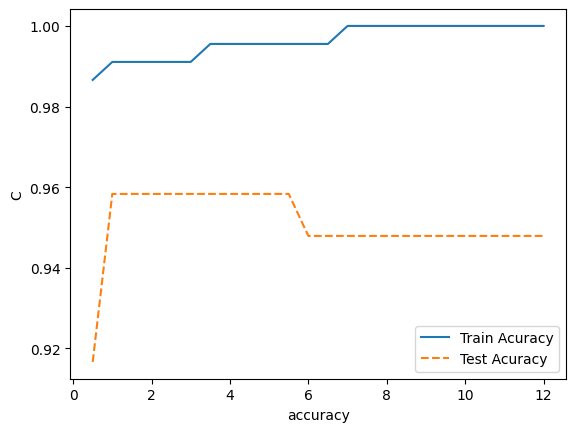

In [16]:
plt.plot(para_c, train_accuracy, linestyle = '-',label = 'Train Acuracy')
plt.plot(para_c, test_accuracy, linestyle = '--',label = 'Test Acuracy')
plt.xlabel('accuracy'); plt.ylabel('C')
plt.legend()

- Cost 값이 6 에서 정확도 성능이 좋다고 나타나므로 6을 선택한다.

## gamma 파라미터 설정

- SVM 에서 kernel의 최적화를 도와주는 파라미터는 gamma 로 하나의 데이터가 동일한 클래스로 분류되게 하는 영향력 거리이다.
- 결정 경계의 곡률을 조정하여 gamma 가 작을수록 데이터 영향거리가 커지고 gamma 가 클수록 데이터 영향거리가 작이지는 파라미터이다.
- SVM 은 C , gamma 의 최적 값 탐색을 통해 모델 성능을 높일 수 있으며 두 파라미터가 커질수록 모델 복잡도는 증가한다.

In [17]:
train_accuracy = [] ; test_accuracy = []
para_gamma = [0.05 * gamma for gamma in range(1,11)] # 0.1 - 1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 6 ,random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.05,1.0,0.9375
1,0.10,1.0,0.9271
2,0.15,1.0,0.9271
3,0.20,1.0,0.9062
4,0.25,1.0,0.8958
5,0.30,1.0,0.8958
6,0.35,1.0,0.8750
7,0.40,1.0,0.8750
8,0.45,1.0,0.8646
9,0.50,1.0,0.8542


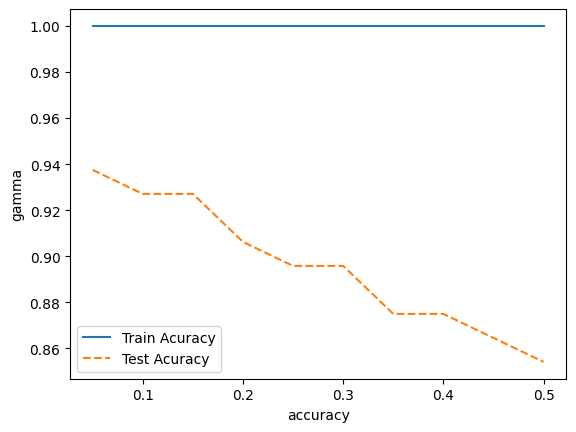

In [18]:
plt.plot(para_gamma, train_accuracy, linestyle = '-',label = 'Train Acuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--',label = 'Test Acuracy')
plt.xlabel('accuracy'); plt.ylabel('gamma')
plt.legend()

- train 데이터에서의 성능은 1로 계속 유지되며 과적합 경향이 나타남
- test 데이터 기준 정확도 성능이 0.5 에서 0.9453 , 이후 성능이 감소하는 모습을 보여준다.

## 최종 svm 모델 성능보기

In [19]:
svc_final = SVC(gamma = 0.05, C= 6 , random_state=1234)
svc_final.fit(df_train_x, df_train_y)
y_pred = svc_final.predict(df_test_x)

print(f'Train Accuracy {svc_final.score(df_train_x,df_train_y):.3f}')
print(f'Test Accuracy: {svc_final.score(df_test_x, df_test_y):0.3f}')
print(f'\nTest Confusion matrix: \n{confusion_matrix(df_test_y, y_pred)}')
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy 1.000
Test Accuracy: 0.938

Test Confusion matrix: 
[[21  3]
 [ 3 69]]
              precision    recall  f1-score   support

           0      0.875     0.875     0.875        24
           1      0.958     0.958     0.958        72

    accuracy                          0.938        96
   macro avg      0.917     0.917     0.917        96
weighted avg      0.938     0.938     0.938        96



In [20]:
30/ (30+1)

0.967741935483871

- confusion matrix 결과
- TN = 30 , FP = 1 , FN = 6 , TP = 91
- 정확도(Accuracy) = (TP+TN)/(TP+FP+FN+TN) = 0.945 으로 정분류율이 94.5% 이다.
- 정밀도(Precision) '1' 기준 f1-score = TP/(TP+FP) = 0.963 이다.
- 재현율(Recall) = TP/(TP+FN) = 0.938
- 특이도(Specificity) = TN/(TN+FP) = 0.967
- 정분류율이 94.5%로 성능이 준수하게 나타난다
- f1-score가 낮았다면 정밀도와 재현율의 조화평균이 낮은 것으로 데이터 불균형을 의심할 수 있고 오버샘플링을 통해 해결할 수 있는 특징이 있다.

In [21]:
estimator = SVC(random_state=1234)

param_grid = {"C":para_c,'gamma':para_gamma}

grid_rf = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)
print(f'best estimator model:\n{grid_rf.best_estimator_}')
print(f'best parameter:\n{grid_rf.best_params_}')
print(f'best score:\n{grid_rf.best_score_.round(3)}')

best estimator model:
SVC(C=1.5, gamma=0.05, random_state=1234)
best parameter:
{'C': 1.5, 'gamma': 0.05}
best score:
0.969


- 최적 파라미터 찾기 결과 0.963 으로 나오므로 최적 파라미터 성능 모델을 이용하는 것이 합리적이라고 생각한다.

# 2. KNN 과제

In [22]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler as SS

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

## 데이터 구성 및 확인

In [23]:
df = pd.read_csv('./datasets/유방암.csv',encoding='euc-kr')
display(df.head())
display(df.info())

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

None

## 데이터 결측치, 이상치 확인

In [24]:
display(df.isnull().sum(axis=0).sort_values(ascending=False))

diagnosis                  0
compactness_error          0
worst_symmetry             0
worst_concave_points       0
worst_concavity            0
worst_compactness          0
worst_smoothness           0
worst_area                 0
worst_perimeter            0
worst_texture              0
worst_radius               0
fractal_dimension_error    0
symmetry_error             0
concave_points_error       0
concavity_error            0
smoothness_error           0
mean_radius                0
area_error                 0
perimeter_error            0
texture_error              0
radius_error               0
mean_fractal_dimension     0
mean_symmetry              0
mean_concave_points        0
mean_concavity             0
mean_compactness           0
mean_smoothness            0
mean_area                  0
mean_perimeter             0
mean_texture               0
worst_fractal_dimension    0
dtype: int64

In [25]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


In [26]:
# 데이터 분리 : 설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("diagnosis_음성", axis = 1, inplace = False)
df_raw_y = df_raw_dummy['diagnosis_음성']
display(df_raw_x.head())
display(df_raw_y.head())

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

## 데이터 스케일링

In [27]:
df_raw_x_num = df_raw_x.select_dtypes(include = "float64")
v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns = v_feature_names)
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())

'Scale 변환 전:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'Scale 변환 후:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


## test, train 데이터 분할 작업

In [28]:
df_train_x , df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled,df_raw_y,
                                                                 test_size=0.4,random_state=1234)

## custum 되지않은 KNN

In [31]:
knn_uncust = KNN()
knn_uncust.fit(df_train_x,df_train_y)

print("Train Acc:",knn_uncust.score(df_train_x,df_train_y))
print("Test Acc:",knn_uncust.score(df_test_x,df_test_y))


Train Acc: 0.9583333333333334
Test Acc: 0.921875


- 정확도는 train 95.8% test 92.1% 유사하나 과소적합

In [32]:
print(knn_uncust.get_params().keys())
print(knn_uncust.get_params().values())


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


## 이웃 수 파라미터 설정

In [33]:
train_acc = []
test_acc = []

para = [i for i in range(1,16)]
for ne in para:
    knn = KNN(n_neighbors=ne)
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_test_x,df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['Neighbors'] = para
df_accuracy['TrainScore'] = train_acc
df_accuracy['TestScore'] = test_acc
print(df_accuracy.round(3))


    Neighbors  TrainScore  TestScore
0           1       1.000      0.953
1           2       0.969      0.914
2           3       0.969      0.914
3           4       0.964      0.906
4           5       0.958      0.922
5           6       0.958      0.898
6           7       0.964      0.906
7           8       0.964      0.906
8           9       0.964      0.930
9          10       0.964      0.914
10         11       0.964      0.914
11         12       0.969      0.898
12         13       0.974      0.898
13         14       0.969      0.906
14         15       0.969      0.914


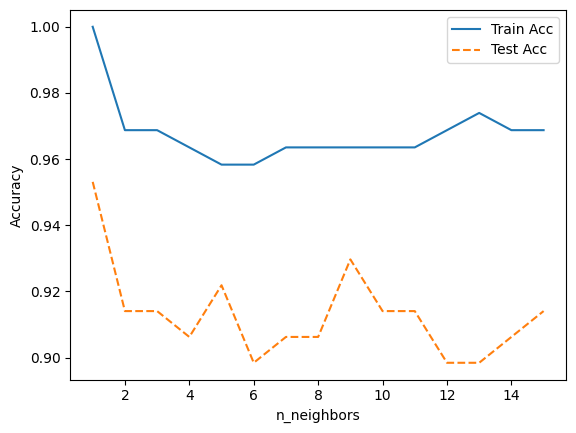

In [34]:
plt.plot(para,train_acc,linestyle='-',label='Train Acc')
plt.plot(para,test_acc,linestyle='--',label='Test Acc')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

- 이웃 수가 1일때 train 모델의 과적합으로 전체 표본 및 특성을 고려하여 9를 선택함
- 이후 이웃 수가 9일때 최대성능을 보임

## 가중치 이웃수 증가 파라미터 성능 확인

In [35]:
train_acc = []
test_acc = []

para = [i for i in range(1,11)] * 2
para_weights = (['uniform'])* 10 + (['distance']*10)

for ne,we in zip(para,para_weights):
    knn = KNN(n_neighbors=ne,weights=we)
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_test_x,df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['Neighbors'] = para
df_accuracy['Weights'] = para_weights
df_accuracy['TrainScore'] = train_acc
df_accuracy['TestScore'] = test_acc
print(df_accuracy.round(3))

    Neighbors   Weights  TrainScore  TestScore
0           1   uniform       1.000      0.953
1           2   uniform       0.969      0.914
2           3   uniform       0.969      0.914
3           4   uniform       0.964      0.906
4           5   uniform       0.958      0.922
5           6   uniform       0.958      0.898
6           7   uniform       0.964      0.906
7           8   uniform       0.964      0.906
8           9   uniform       0.964      0.930
9          10   uniform       0.964      0.914
10          1  distance       1.000      0.953
11          2  distance       1.000      0.953
12          3  distance       1.000      0.914
13          4  distance       1.000      0.922
14          5  distance       1.000      0.922
15          6  distance       1.000      0.930
16          7  distance       1.000      0.906
17          8  distance       1.000      0.914
18          9  distance       1.000      0.930
19         10  distance       1.000      0.922


In [36]:
df_acc_weights_pivot = df_accuracy.pivot(index='Neighbors',columns='Weights',
                                values=['TrainScore','TestScore'])
df_acc_weights_pivot

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000  0.953125  0.953125
2                1.0  0.968750  0.953125  0.914062
3                1.0  0.968750  0.914062  0.914062
4                1.0  0.963542  0.921875  0.906250
5                1.0  0.958333  0.921875  0.921875
6                1.0  0.958333  0.929688  0.898438
7                1.0  0.963542  0.906250  0.906250
8                1.0  0.963542  0.914062  0.906250
9                1.0  0.963542  0.929688  0.929688
10               1.0  0.963542  0.921875  0.914062

In [37]:
level0 = df_acc_weights_pivot.columns.get_level_values(0)
level1 = df_acc_weights_pivot.columns.get_level_values(1)

df_acc_weights_pivot.columns = level0 +"-" + level1
df_acc_weights_pivot.head()

,TrainScore-distance,TrainScore-uniform,TestScore-distance,TestScore-uniform
Neighbors,,,,
1,1.0,1.000000,0.953125,0.953125
2,1.0,0.968750,0.953125,0.914062
3,1.0,0.968750,0.914062,0.914062
4,1.0,0.963542,0.921875,0.906250
5,1.0,0.958333,0.921875,0.921875


Text(0, 0.5, 'Accuracy')

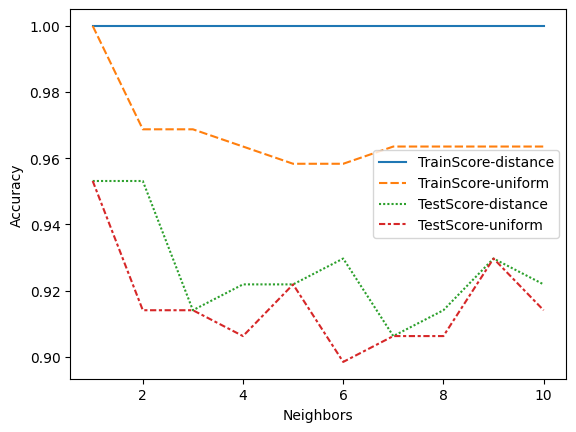

In [38]:
sns.lineplot(data=df_acc_weights_pivot)
plt.ylabel("Accuracy")

In [39]:
train_acc = []
test_acc = []

para = [i for i in range(1,11)]*2
para_m = (['euclidean'])* 10 + (['manhattan']*10)

for (ne,me) in zip(para,para_m):
    knn = KNN(n_neighbors=ne,metric=me,weights='uniform')
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_test_x,df_test_y))

df_accuracy2 = pd.DataFrame()
df_accuracy2['Neighbors'] = para
df_accuracy2['Metrics'] = para_m
df_accuracy2['TrainScore'] = train_acc
df_accuracy2['TestScore'] = test_acc
print(df_accuracy.round(3))


    Neighbors   Weights  TrainScore  TestScore
0           1   uniform       1.000      0.953
1           2   uniform       0.969      0.914
2           3   uniform       0.969      0.914
3           4   uniform       0.964      0.906
4           5   uniform       0.958      0.922
5           6   uniform       0.958      0.898
6           7   uniform       0.964      0.906
7           8   uniform       0.964      0.906
8           9   uniform       0.964      0.930
9          10   uniform       0.964      0.914
10          1  distance       1.000      0.953
11          2  distance       1.000      0.953
12          3  distance       1.000      0.914
13          4  distance       1.000      0.922
14          5  distance       1.000      0.922
15          6  distance       1.000      0.930
16          7  distance       1.000      0.906
17          8  distance       1.000      0.914
18          9  distance       1.000      0.930
19         10  distance       1.000      0.922


Text(0, 0.5, 'Accuracy')

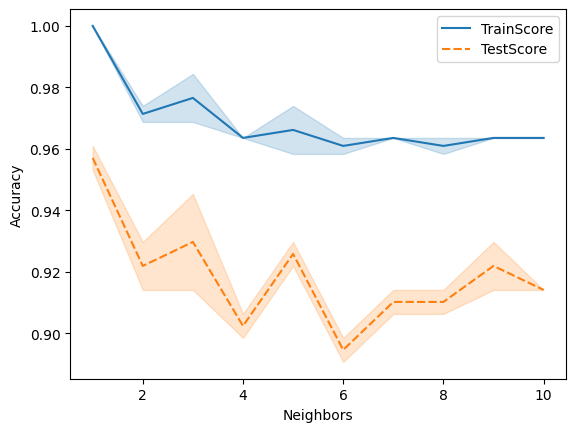

In [40]:
df_acc_metric_pivot = df_accuracy2.pivot(index='Neighbors',columns='Metrics',
                                       values=['TrainScore','TestScore'])
level0 = df_acc_metric_pivot.columns.get_level_values(0)
level1 = df_acc_metric_pivot.columns.get_level_values(1)

df_acc_weights_pivot.columns = level0 +"_" + level1
sns.lineplot(data = df_acc_metric_pivot)
plt.ylabel('Accuracy')

- metric 은 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [41]:
knn_model = KNN(n_neighbors=9, weights='uniform',metric='euclidean')
knn_model.fit(df_train_x,df_train_y)
y_pred = knn_model.predict(df_test_x)

print('train data acc:',knn_model.score(df_train_x,df_train_y))
print('test data acc:',knn_model.score(df_test_x,df_test_y))
print(' Confusion matrix\n','     ㅣ     \n',
      '     ㅣ     \n','      ▿     \n',confusion_matrix(df_test_y,y_pred))
print(classification_report(df_test_y,y_pred,digits=3))

train data acc: 0.9635416666666666
test data acc: 0.9296875
 Confusion matrix
      ㅣ     
      ㅣ     
       ▿     
 [[30  1]
 [ 8 89]]
              precision    recall  f1-score   support

           0      0.789     0.968     0.870        31
           1      0.989     0.918     0.952        97

    accuracy                          0.930       128
   macro avg      0.889     0.943     0.911       128
weighted avg      0.941     0.930     0.932       128



- confusion matrix 결과
- TN = 31 , FP = 0 , FN = 12 , TP = 85
- 정확도(Accuracy) = (TP+TN)/(TP+FP+FN+TN) = 0.906 으로 정분류율이 90.6% 이다.
- 정밀도(Precision) '1' 기준 f1-score = TP/(TP+FP) = 0.934
- 재현율(Recall) = TP/(TP+FN) = 0.876
- 특이도(Specificity) = TN/(TN+FP) = 1
- 즉, 실제 값을 잘 예측한다고 할 수 있다. 이는 오버샘플링을 제외한 분류로 차이가 있을 수 있다